## Author: Dr. Prabhakar Bhimalapuram for Course "Computing in Sciences II" as part of CND program


# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by:
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$

r
If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have:
$$ Prob(x< M_n < y) = \sum_{r = ⌊nx⌋ }^{r= ⌊ n*y ⌋} P(r;n) $$
where $\lfloor y \rfloor$ is the floor function defined as the largest integer less that $y$.



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

NOTE:
1. scipy.misc.comb function for combinotrics
2. Do this by curve fit of $P$ to a gaussian function

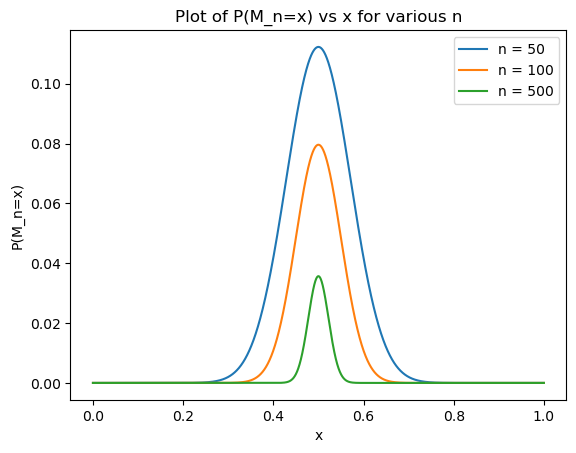

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def P(M, n, p):
    q = 1 - p
    return comb(n, M) * p**M * q**(n-M)  #function to return probability based on given formula, n choose M times prob of event1 to the power of the number of times it occurs and same with event2

n_values = [50, 100, 500] #3 chosen n values
x_values = np.linspace(0, 1, 5000)  #5000 random numbers bw 0 and 1, because 0<=x<=1, x=p=1-q

for n in n_values: #calculate points for each n
    y_values = P((x_values * n), n, 0.5)  #y values being the prob where m value=x_values*n and n=n and the chosen prob of each p and q is 0.5
    plt.plot(x_values, y_values, label=f'n = {n}') #plotting the graph with x values being the random nums and y being the prob, no need to normalise due to the random nums being from 0 and 1

plt.xlabel('x')
plt.ylabel('P(M_n=x)')
plt.title('Plot of P(M_n=x) vs x for various n')
plt.legend()
plt.show()

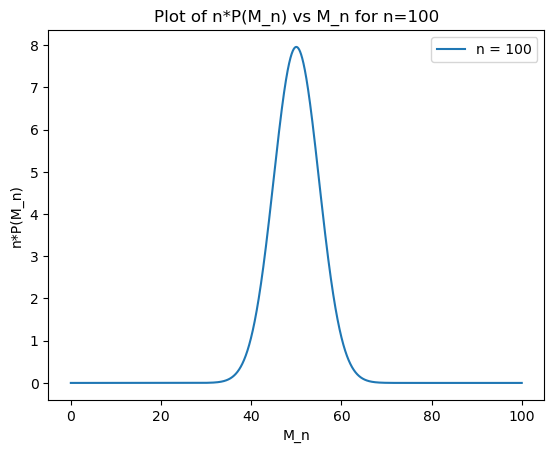

In [9]:
n = 100 #initialize value of n
M_n = (x_values * n) #get value of m_n as an array
y_values = n * P(M_n, n, 0.5) #calculate y value which is same as last time, but we just multiply it with n for this problem
plt.plot(M_n, y_values, label=f'n = {n}') #plot it

plt.xlabel('M_n')
plt.ylabel('n*P(M_n)')
plt.title('Plot of n*P(M_n) vs M_n for n=100')
plt.legend()
plt.show()

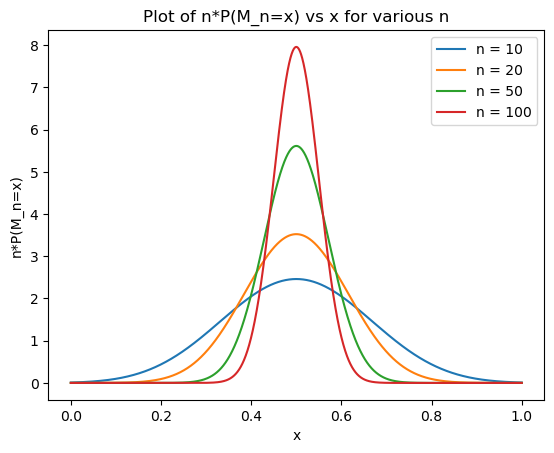

In [3]:
n_values=[10, 20, 50, 100]
for n in n_values:  #loop over each n to find its graph
    y_values = n*P((x_values * n), n, 0.5) # again find n*Prob
    plt.plot(x_values, y_values, label=f'n = {n}') #plot it

plt.xlabel('x')
plt.ylabel('n*P(M_n=x)')
plt.title('Plot of n*P(M_n=x) vs x for various n')
plt.legend()
plt.show()


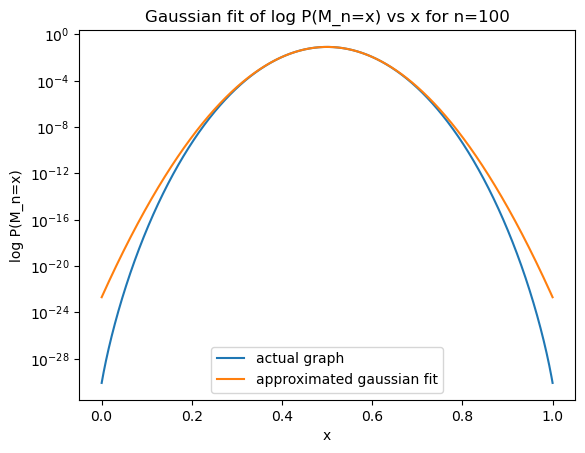

In [165]:
n = 100
from scipy.optimize import curve_fit
y_values = P((x_values * n), n, 0.5) #get the probabilities from function defined eariler
from scipy.optimize import curve_fit
# Gaussian function
def gaussian(x, x0, sigma, height): #define gaussian function, given in notebook. returns the plot points 
    '''gaussian function'''
    return height * np.exp(-(x-x0)**2/(2*sigma**2)) #uses combination of exponential function, height and deviation to get points to plot
m1, m2 = curve_fit(gaussian, x_values, y_values, p0=[0.5, 0.1, 1]) #choose middle to be 0.5, deviation to be 0.1(determines width of curve, but it doesnt seem to make a difference here) and since its normalized the normalization parameter to be 1
#m1 contains optimized parameters vector(the mean, standarddeviation sigma, and normalization factor), m2 has estimated covariance matrix
plt.semilogy(x_values, y_values, label='actual graph')

plt.semilogy(x_values, gaussian(x_values, *m1), label='approximated gaussian fit') #sends the parameters to gaussian function then plots it

plt.xlabel('x')
plt.ylabel('log P(M_n=x)')
plt.title('Gaussian fit of log P(M_n=x) vs x for n=100')
plt.legend()

plt.show()

**Compare the curve fit to the actual function**

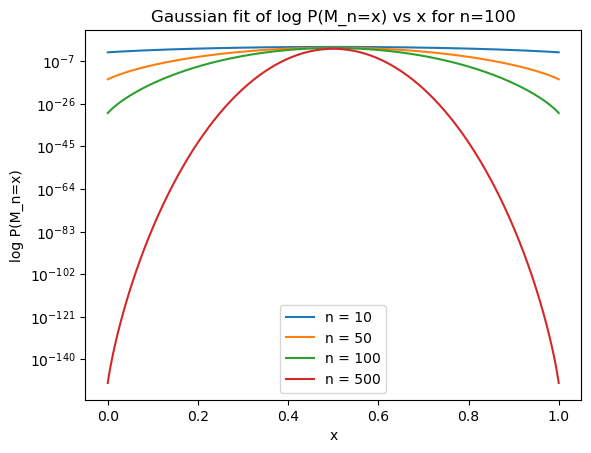

In [180]:
array=[10, 50, 100, 500]
for k in array:  #for multiple n
    n=k #random variable cuz im too lazy to change n cuz i copied from previous cell XD
    from scipy.optimize import curve_fit
    y_values = P((x_values * n), n, 0.5) #get the probabilities from function defined eariler
    
    plt.semilogy(x_values, y_values,label=f'n = {n}') #plot using semilogy for logarithmic scale


    plt.xlabel('x')
    plt.ylabel('log P(M_n=x)')
    plt.title('Gaussian fit of log P(M_n=x) vs x for n=100')
    plt.legend()

plt.show()

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$. Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

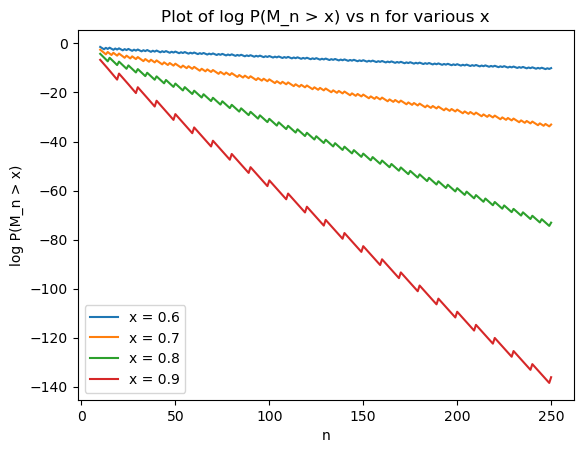

In [184]:

x_values = [0.6, 0.7, 0.8, 0.9]

n_values = np.arange(10, 251) #start from 10 so that binomial distribution has enough samples to approximate it, according to CLT(central limit theorem), for a large enough n, the binomial distr will be close to a normal distr

slopes=[]
intercepts=[]

def task2(x_values, n_values, j):
    global probabilities  # Declare probabilities as a global variable
    probabilities = []  # Initialize probabilities list
    for x in x_values:
        for n in n_values:
            sumofprob = 0
            for k in range(int(np.ceil(x*n)), n): #sum all the prob for prob>M_n=x*n
                sumofprob += P(k, n, 0.5)
            probabilities.append(sumofprob) #append prob to the array

        # Fit a line to the log of the probabilities
        fitted_fun = np.polyfit(n_values, np.log2(probabilities), 1) #get the fitting graph for the n vs prob by sending them as well as specifying the degree of the eq which is 1 cuz its linear
        slope = fitted_fun[0] #first parameter is the slope
        intercept = fitted_fun[1] #second is the intercept
        slopes.append(slope) #append both to the array we maintain for later
        intercepts.append(intercept)
        if(j): #if required, plot the n vs log prob graph
            plt.plot(n_values, np.log2(probabilities), label=f'x = {x}')
            
            #plt.semilogy(n_values, probabilities) #tried using logarithmic scale to plot a straight line, didnt work TT
        probabilities = []  # Reset probabilities for the next x value

# Call the task2 function
task2(x_values,n_values, True)

plt.xlabel('n')
plt.ylabel('log P(M_n > x)')
plt.title('Plot of log P(M_n > x) vs n for various x')
plt.legend()

plt.show()

## Task-3: Note that for large $N$, the above plots are linear.  Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

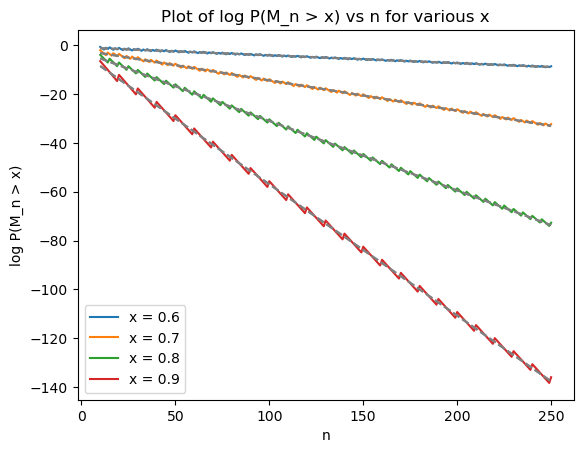

In [113]:
task2(x_values, n_values, True) #plotting the actual graph using previously defined function and plot attribute=true

def line_equation(x, slope, intercept):  #line equation to get value of y
    return slope * x + intercept

for slope, intercept in zip(slopes, intercepts):  #plotting the graph using slope intercept and calling the line function for y value
    plt.plot(n_values, line_equation(n_values, slope, intercept), '--', color='gray')

plt.xlabel('n')
plt.ylabel('log P(M_n > x)')
plt.title('Plot of log P(M_n > x) vs n for various x')
plt.legend()

plt.show()



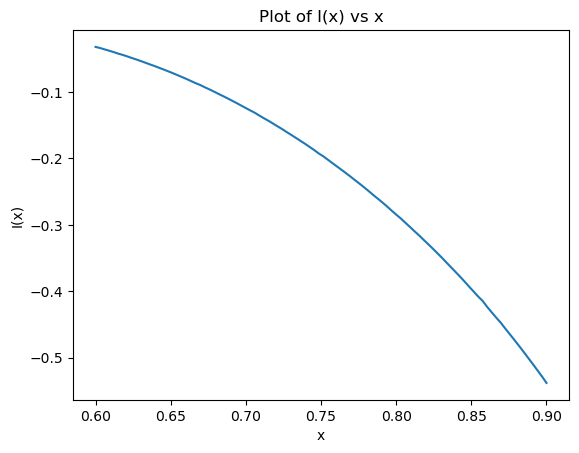

In [125]:
p = 0.5
x_values = np.linspace(0.6, 0.9, 100) #new x_Values and n_values

n_values = np.arange(10, 251)

slopes = []
#mind u it works but takes really long time lol
task2(x_values, n_values, False) #calls the task2 function but doesnt plot the lines of that subtask. instead it populates the slop and intercept properly for the x and n we send

plt.plot(x_values, slopes)
plt.xlabel('x')
plt.ylabel('I(x)')
plt.title('Plot of I(x) vs x')
plt.show()

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

##Plot a one realisation of $x(t)$ for $t\in[0,100]$


0.96


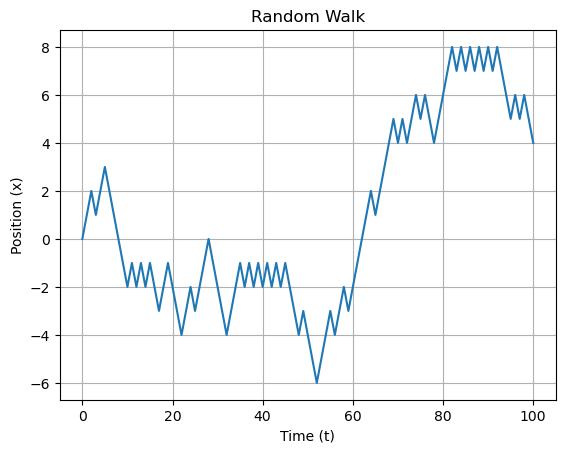

In [188]:



delta = 1 #step deviation size 
steps = 100  #number of steps we take


coin_tosses = np.random.randint(0, 5000, size=steps) #100 random integers between 0 and 5000


x = np.zeros(steps+1) #initialize array of 101 elements(plus for one 0th/last step
average=0
average_array=np.zeros(steps+1)
average_array2=np.zeros(steps+1)
for t in range(steps):
    if coin_tosses[t]%2==0: #if even, we go down. else, up. theres equal prob for both
        x[t + 1] = x[t] - delta
    else:
        x[t + 1] = x[t] + delta
    average=average+x[t+1] #sum all steps and average it for the mean
    average_array[t+1]=np.sum(x[:t+2]) / (t + 2) #average of all values till that point added in array
    average_array2[t + 1] = np.mean(x[:t+2]**2) #average^2 of all values till that point added in array

average=average/100
print(average) #prints average deviation


plt.plot(range(num_steps + 1), x)
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Random Walk')
plt.grid(True)
plt.show()


## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$?
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

In [109]:
# PLOT < x(t)> vs t, < x^2(t) > vs t for say N=1000 walks

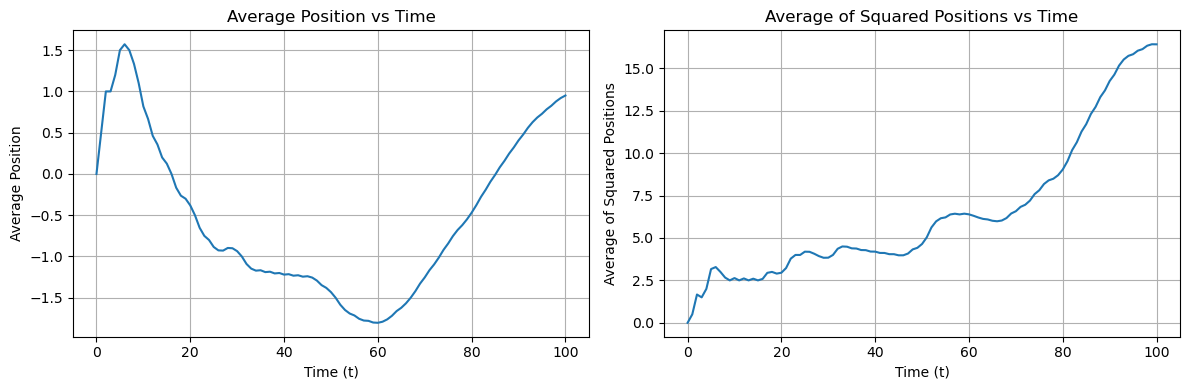

In [189]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) #multiple plots
plt.plot(range(steps + 1), average_array) #plots average position on y axis and time(no of steps) on x
plt.xlabel('Time (t)')
plt.ylabel('Average Position')
plt.title('Average Position vs Time')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(steps + 1), average_array2) #plots average pos squared on y and time on x
plt.xlabel('Time (t)')
plt.ylabel('Average of Squared Positions')
plt.title('Average of Squared Positions vs Time')
plt.grid(True)

plt.tight_layout() #to ensure no overlapping content
plt.show()

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail (or home?), where once the 'drunk' random walker reaches, is trapped for ever.

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$.

## Compute $y_M(t)$ by generating a sample of random walks. Comment.

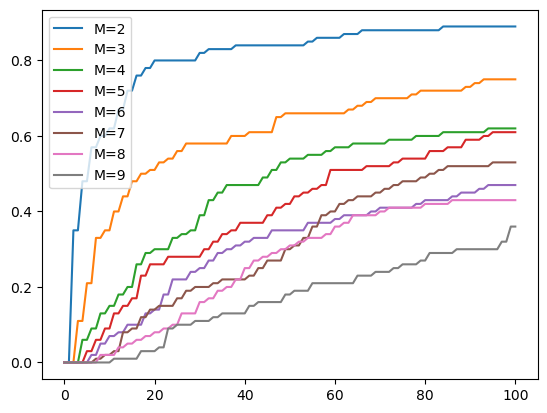

In [160]:
import numpy as np
import matplotlib.pyplot as plt

delta = 1 #step deviation size 
steps = 100  #number of steps we take

for M in range(2,10): #we calculate for traps ranging from 2 to 10 not including 10
    trap = np.zeros(steps+1) #initiate an array to calculate prob later on
    
    for no_of_walks in range(1, steps+1): #do a set number of walks for populating sample space
        
        coin_tosses = np.random.randint(0, 5000, size=steps) #100 random integers between 0 and 5000
        x = np.zeros(steps+1)
        for t in range (steps): #same old random walk
            if(x[t]==M): #but heres the twist, if its trapped we keep it there itself
                x[t+1]=x[t]
            else:
                if(coin_tosses[t-1]%2==0): #if even, we go down. else, up. theres equal prob for both
                    x[t+1]=x[t]-delta
                else:
                    x[t+1]=x[t]+delta
                
        for t in range(steps+1): #count the freq of trap to calculate prob later on
            if(x[t]==M):
                trap[t]+=1

    prob=[i/no_of_walks for i in trap]  #find prob of trap for each M as an array, it slowly inches towards 1 but never quite reaches there

    plt.plot(prob,label="M=%d"%M)

plt.legend()
plt.show()


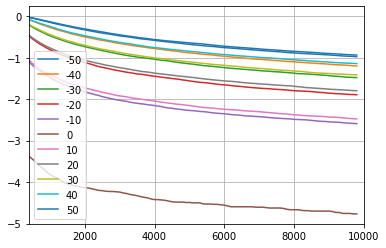

## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

Both of them are stochastic processes. The next state of the system is random(in a quantum state of 2 different states). This makes the process stochastic as we are using a collection of random variables that are indexed by some mathematical set. We also see the evolution of probabilities(number of heads exceeding threshold vs being trapped in a position) over time. 
They are not the same type of stochastic process, the coin-toss is a bernoulli problem(each trial has only two outcomes). The second process is a random walk, as it's name suggests and it's quite literally what it is(path of object is a succession of random steps). The coin-toss is memoryless; i.e, it's current state is independent of it's previous states. This is not the case for random walk, where the previous state plays a role in the next state. Also, the number of heads follows a binomial distribution and hence a normal distribution for larges sample space, but this is not the case for walk. But, the coin-toss can be used to generate the next step of the random walk. In a way, they are similar yet different.
 
Rate of reaching the trap is proportional to the distance from the starting point(30 is closer than 50). This is like how the coin toss have probability 0.9 gets u closer to 1 than 0.6.